In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Esto es para obtener el código para San Francisco de Campeche

In [2]:
f = '../data/raw/catun_municipio/AGEEML_20258131423976_utf.csv'
ubica_geo = pd.read_csv(f, encoding="utf-8"
                       # usecols = ['folioviv','aire_acond','entidad','factor']
                      )
ubica_geo

,MAPA,CVE_ENT,NOM_ENT,NOM_ABR,CVE_MUN,NOM_MUN,CVE_CAB,NOM_CAB,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS
0,1001,1,Aguascalientes,Ags.,1,Aguascalientes,0001,Aguascalientes,948990,462073,486917,266942
1,1002,1,Aguascalientes,Ags.,2,Asientos,0001,Asientos,51536,25261,26275,12544
2,1003,1,Aguascalientes,Ags.,3,Calvillo,0001,Calvillo,58250,28563,29687,15556
3,1004,1,Aguascalientes,Ags.,4,Cosío,0001,Cosío,17000,8292,8708,3938
4,1005,1,Aguascalientes,Ags.,5,Jesús María,0001,Jesús María,129929,64219,65710,33229
...,...,...,...,...,...,...,...,...,...,...,...,...
2473,32054,32,Zacatecas,Zac.,54,Villa Hidalgo,0001,Villa Hidalgo,19446,9504,9942,4951
2474,32055,32,Zacatecas,Zac.,55,Villanueva,0001,Villanueva,31558,15590,15968,9052
2475,32056,32,Zacatecas,Zac.,56,Zacatecas,0001,Zacatecas,149607,71972,77635,42424
2476,32057,32,Zacatecas,Zac.,57,Trancoso,0001,Trancoso,20455,10039,10416,4671


In [3]:
ubica_campeche = ubica_geo[ubica_geo["NOM_CAB"].str.contains("San Francisco de Campeche", case=False, na=False)]
ubica_campeche

,MAPA,CVE_ENT,NOM_ENT,NOM_ABR,CVE_MUN,NOM_MUN,CVE_CAB,NOM_CAB,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS
24,4002,4,Campeche,Camp.,2,Campeche,0001,San Francisco de Campeche,294077,141555,152522,85353


Entonces el código es 4002, dos digitos para el estado 04, y tres para el municipio 002

## Importamos y filtramos con el código para San Francisco de Campeche

## Descripción de las variables (carácteristicas de la vivienda sin cargas electricas)
Para la limpieza de datos se utilizaron XXX variables.

### folioviv: Identificador de la vivienda
Identificador de la vivienda compuesto por dos dígitos con la clave de la entidad federativa, uno con el ámbito (urbano, código diferente a 6;
rural, código 6), cuatro dígitos del número consecutivo de la UPM, un dígito de la decena de levantamiento y dos dígitos con un número consecutivo para la vivienda seleccionada. Se ubica en todas las tablas.

Es la llave que nos permite correlacionar difertes tablas de la ENIGH y tal vez de la ENUT XXX. Con el digito que corresponde a rural o urbano, podremos ver cuales datos corresponden a la ciudad y cuales a los pueblos cercanos. 

### ubica_geo: Ubicación geográfica
Contiene la ubicación geográfica de la vivienda. Los dos primeros dígitos representan la clave de la entidad y los siguientes tres la clave del
municipio. Estas corresponden al Catálogo de claves de entidades federativas, municipios y localidades, que está disponible en el sitio del INEGI
https://www.inegi.org.mx/app/ageeml/

Nos permite separar los datos por municipio. Se ubica en la tabla "viviendas".


### factor: Factor de expansión 
El factor de expansión constituye el peso que se le da a cada unidad muestral para generalizar los resultados de la muestra a la población. Se ubica en todas las tablas.

### mat_pared, mat_techos, mat_pisos: Materiales de construcción
Estas tres variables constituyen los materiales de construcción para cada vivienda, utilizandolas se pueden obtener los distintos sistemas constructivos. Se ubica en la tabla "viviendas".

- mat_pared
1. = Material de desecho 
2. = Lámina de cartón  
3. = Lámina de asbesto o metálica 
4. = Carrizo, bambu o palma
5. = Embarro o embajareque
6. = Madera
7. = Adobe
8. = Tabique, ladrillo, block, piedra, cantera, cemento o concreto

- mat_techos
1. = Material de desecho
1. = Lámina de cartón
1. = Lámina metálica
1. = Lámina de asbesto
1. = Lámina de fibrocemento ondulada (techo fijo)
1. = Palma o paja
1. = Madera o tejamanil
1. = Terrado con viguería
1. = Teja
1. = Losa de concreto o viguetas con bovedilla

- mat_pisos
1. = Tierra
1. = Cemento o firme
1. = Madera, mosaico u otro recubrimiento

### disp_elect: Disponibilidad eléctrica
Fuente de donde se obtiene la energía eléctrica en la vivienda. Será útil para seleccionar solo a quienes tienen servicio electrico (para poder asignarles un consumo en kWh a partir de lo que pagaron en MNX del 2024). Se ubica en la tabla "viviendas".

1. = Del servicio público
2. = De una planta particular
3. = De panel solar
4. = De otra fuente
5. = No tiene luz eléctrica

### tot_hog: Total de hogares en la vivienda
En una misma vivienda pueden haber varios hogares, por ejemplo, que en el primer piso viva una familia y en el segundo otra. En este estudio se consideraran a todos los hogares de una vivienda como uno solo. Se ubica en la tabla "viviendas".

### gasto_tri, Gasto trimestral
El gasto trimestral normalizado de acuerdo a la decena de levantamiento en la ENIGH significa que el INEGI ajusta los gastos reportados por los hogares para hacerlos comparables, ya que las entrevistas se realizan en diferentes “decenas de levantamiento” (bloques de 10 días). Como cada hogar declara sus gastos en periodos de referencia distintos según cuándo fue encuestado, la normalización corrige esas diferencias temporales, por ejemplo, variaciones de precios o de temporada y así el gasto trimestral refleja un periodo estándar común para toda la muestra.

Para fines de este trabajo solo se consideran los gastos relacionados con el consumo de electricidad, para ello se filtran los que contengan la clave 045100 y se suman los valores de todos los hogares que habiten en la misma vivienda. 

## Descripción de las variables (carácteristicas de los residentes)

Las variables de esta seccion se encuentran en dos tablas, vivinedas y POBLACION. Todas nos pueden ser útiles para coorelacionar con los datos de la encuesta ENUT.

### tot_resid: Total de residentes de la vivienda
Número de personas que habitan la vivienda, muy útil para los perfiles de ocupación y consumo. Se ubica en la tabla "viviendas".

### est_socio: Estrato socioeconómico
Clasificación de las viviendas del país de acuerdo a ciertas características socioeconómicas de las personas que las habitan, así como características físicas y el equipamiento de las mismas expresadas por medio de 34 indicadores construidos con información del Censo de Población y Vivienda 2010. Esta estratificación se realizó por medio de métodos estadísticos multivariados. Se ubica en la tabla "viviendas".

Será muy útil para formar los grupos y para asignar consumos en el módelo de ML.

1. = Bajo
2. = Medio bajo
3. = Medio alto
4. = Alto

### edu_ini: Asistencia educación inicial
Lugar al que asiste para su educación inicial, se encuentra en la tabla "POBLACION"

1. = Una estancia infantil
2. = Una guardería pública (IMSS, ISSSTE, SEDENA, SEMAR, PEMEX)
3. = Un centro de Desarrollo Infantil (CENDI) o Centro Asistencial de Desarrollo Infantil (CADI)
4. = Educación inicial
5. = Otras guarderías
6. = No asiste a guardería

### asis_esc: Asistencia a la escuela
Situación que distingue a las personas de 3 o más años según asistan o no a algún establecimiento de enseñanza escolar del Sistema Educativo Nacional (SEN), se encuentra en la tabla "POBLACION"

1. = Sí
2. = No

### nivel: Nivel escolar al que asiste
Nivel al que asiste a la escuela el integrante del hogar de 3 o más años dentro del Sistema Educativo Nacional, se encuentra en la tabla "POBLACION".

1. = Estancias infantiles
1. = Guarderías públicas (IMSS, ISSSTE, SEDENA, SEMAR, PEMEX)
1. = Centro de Desarrollo Infantil (CENDI) o Centro Asistencial de Desarrollo Infantil (CADI)
1. = Otras guarderías
1. = Preescolar o kinder
1. = Primaria
1. = Secundaria
1. = Estudios técnicos con secundaria terminada
1. = Preparatoria o bachillerato
1. = Estudios técnicos con preparatoria terminada
1. = Licenciatura o Ingeniería (profesional)
1. = Especialidad
1. = Maestría
1. = Doctorado

### grado: Grado escolar al que asiste
Grado al que asiste a la escuela el integrante del hogar de 3 o más años dentro del Sistema Educativo Nacional, se encuentra en la tabla "POBLACION". 

1. = Primer año
2. = Segundo año
3. = Tercer año
4. = Cuarto año
5. = Quinto año
6. = Sexto año

### Uso del tiempo 
Las siguientes variables corresponden al uso del tiempo de los residentes de cada vivienda. Todos incluyen un avariable para las horas y otra para los minutos que realizaron dicha actividad durante la semana pasada, así como una variable para indicar si la persona realizó o no la actividad o si no lo recuerda (tomando valores de 8 y 9 en cada caso), todas se encuentran en la tabla "POBLACION". 

* Horas y minutos de trabajo (hor_1, min_1)
* No trabajó o no recuerda haber trabajado (usotiempo1)
* Horas y minutos de estudio (hor_2, min_2)
* No estudió o no recuerda haber estudiado (usotiempo2)
* Horas y minutos de trabajo comunitario voluntario (hor_3, min_3)
* No hizo o no recuerda haber hecho trabajo comunitario voluntario (usotiempo3)
* Horas y minutos dedicados al cuidado de otras personas sin pago (hor_4, min_4)
* No cuido o no recuerda haber cuidado a otros sin pago (usotiempo4)
* Horas y minutos dedicados a reparaciones o mantenimiento en la vivienda (hor_5, min_5)
* No realizo o no recuerda haber realizado reparaciones o mantenimiento (usotiempo5)
* Horas y minutos dedicados a quehacer (hor_6, min_6)
* No hizo quehacer o no recuerda haber hecho quehacer (usotiempo6)
* Horas y minutos dedicados a acarrear agua o leña (hor_7, min_7)
* No acarreo o no recuerda haber acarreado (usotiempo7)
* Horas y minutos dedicados a actividades de su gusto (hor_8, min_8)
* No dedico tiempo a su guto o no recuerda haberlo hecho (usotiempo8)

## Descripción de las variables (solo cargas electricas)

Una enorme desventaja es que en la ENIGH no se pregunta cuánto tiempo a la semana se utilizan las cargas, podríamos intentar asignarlo con los datos de la ENCEVI, donde si lo preguntan. 

### aire_acond, calefacc: Aire acondicionado y calefacción 
Estas variables representan las cargas electricas más importantes en una vivienda, no se explicita con cuántos equipos se cuenta. Se ubica en la tabla "viviendas". 

- aire_acond
1. = Sí
2. = No

- calefacc
1. = Sí
2. = No

### focos, focos_ahor: Número total de focos y de focos ahorradores
Total de focos que se usan para iluminar la vivienda, tanto en el interior como en el exterior, en focos se muestra tanto ahorradores como no ahorradores. XXX no especifica cuánto consume un foco ahorrador. Se ubica en la tabla "viviendas". 

### combus: Tipo de ombustible para cocinar
Si es electricidad (5) va a representar una carga electrica importante. Se ubica en la tabla "viviendas".

1. = Leña
2. = Carbón
3. = Gas de tanque
4. = Gas natural o de tubería
5. = Electricidad
6. = Otro combustible
7. = No cocinan


### telefono, celular: Linea telefónica fija y telefono celular
Solo indica si se tiene, pero no en qué cantidad, solo se puede obter cuánto dinero se gasto en celulares el último semestre, pero no con cuántos cuentan. Se ubican en la tabla "viviendas". 
- telefono
1. = Sí
2. = No

- celular
1. = Sí
2. = No

### Numero de electrodomesticos
Aquí se muestran muchas variables de la tabla hogar, todas representan la cantidad de equipos con los que se cuenta, pero no las horas a la semana que se utilizan. Para cada aparato existe otra pregunta para el año en el que se adquierio el más reciente, podríamos usar esto para seleccionar uno y de ahí su consumo, por ejemplo, con consolas de videojuegos, si el año más repetido de cada grupo fue 2018, podemos seleccionar la que más se vendió en México. El valor -1, representa un dato “no especificado”. Se ubican en la tabla "viviendas". 

- num_venti: Número de ventiladores del hogar
- num_ester: Número de estéreos del hogar
- num_radio: Número de radios del hogar
- num_tva: Número de televisores analógicos del hogar
- num_tvd: Número de televisores digitales del hogar
- num_dvd: Número de DVD del hogar
- num_licua: Número de licuadoras del hogar
- num_tosta: Número de tostadores del hogar
- num_micro: Número de hornos de microondas del hogar
- num_refri: Número de refrigeradores del hogar
- num_estuf: Número de estufas del hogar (revisar en "combus" si es electrica)
- num_lavad: Número de lavadoras del hogar
- num_planc: Número de planchas del hogar
- num_maqui: Número de máquinas de coser del hogar
- num_aspir: Número de aspiradoras del hogar
- num_compu: Número de computadoras del hogar
- num_lap: Número de laptop del hogar
- num_table: Número de tablet del hogar
- num_impre: Número de impresoras del hogar
- num_juego: Número de consola de videojuegos

## Como coorrelacionar las encuestas ENIGH y ENUT

No se pueden correlacionar directamente a nivel de individuo o de hogar, porque cada encuesta tiene su propio marco muestral y su propio levantamiento. Es decir, las encuestas no entrevistan a las mismas personas ni usan un identificador común que permita “unir” observaciones una a una. Por estas razones, es necesario encontrar caracteristicas que compartan ambas encuestas para poder separar grupos y determinar indices de cada uno, por ejemplo, por el estado y estrato economico, etc. 


## Importar y acotar tabla VIVIENDA para San Francisco de Campeche (672 lineas)

In [4]:
f = '../data/raw/enigh2024_ns_viviendas_csv/viviendas.csv'
VIVIENDA = pd.read_csv(f, 
                       usecols = ['folioviv','ubica_geo','factor',
                                  'mat_pared','mat_techos','mat_pisos',
                                  'cuart_dorm','num_cuarto',
                                  # no se incluyeron banos
                                  'disp_elect',
                                  'tot_resid','est_socio',
                                  # 'tot_hog',
                                  # Abajo son cargas electricas
                                  'aire_acond','calefacc',
                                  'focos','focos_ahor', 
                                  'combus'] #Es el combustible para cocinar, si es electricidad (5) va a representar una carga electrica importante
                      )
VIVIENDA

C:\Users\roele\AppData\Local\Temp\ipykernel_5704\2770449269.py:2: DtypeWarning: Columns (4,27) have mixed types. Specify dtype option on import or set low_memory=False.
  VIVIENDA = pd.read_csv(f,


,folioviv,mat_pared,mat_techos,mat_pisos,cuart_dorm,num_cuarto,disp_elect,focos,focos_ahor,combus,aire_acond,calefacc,tot_resid,ubica_geo,est_socio,factor
0,100001901,8,10,3,1,4,1,9,9,3,2,2,4,1001,3,207
1,100001902,8,10,3,3,4,1,10,10,3,2,2,4,1001,3,207
2,100001904,8,10,3,2,3,1,11,11,3,2,2,2,1001,3,207
3,100001905,8,10,3,2,3,1,6,6,3,2,2,4,1001,3,207
4,100002501,8,10,3,2,3,1,8,8,3,2,2,4,1001,2,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90319,3260593814,8,10,3,1,2,1,4,3,3,2,2,3,32052,2,183
90320,3260593815,8,10,2,2,4,1,7,5,3,2,2,5,32052,2,183
90321,3260593816,8,10,3,2,3,1,5,0,3,2,2,5,32052,2,183
90322,3260593817,8,10,2,3,4,1,5,5,3,2,2,2,32052,2,183


In [5]:
VIVIENDA.dtypes

folioviv       int64
mat_pared      int64
mat_techos     int64
mat_pisos     object
cuart_dorm     int64
num_cuarto     int64
disp_elect     int64
focos         object
focos_ahor    object
combus        object
aire_acond     int64
calefacc       int64
tot_resid      int64
ubica_geo      int64
est_socio      int64
factor         int64
dtype: object

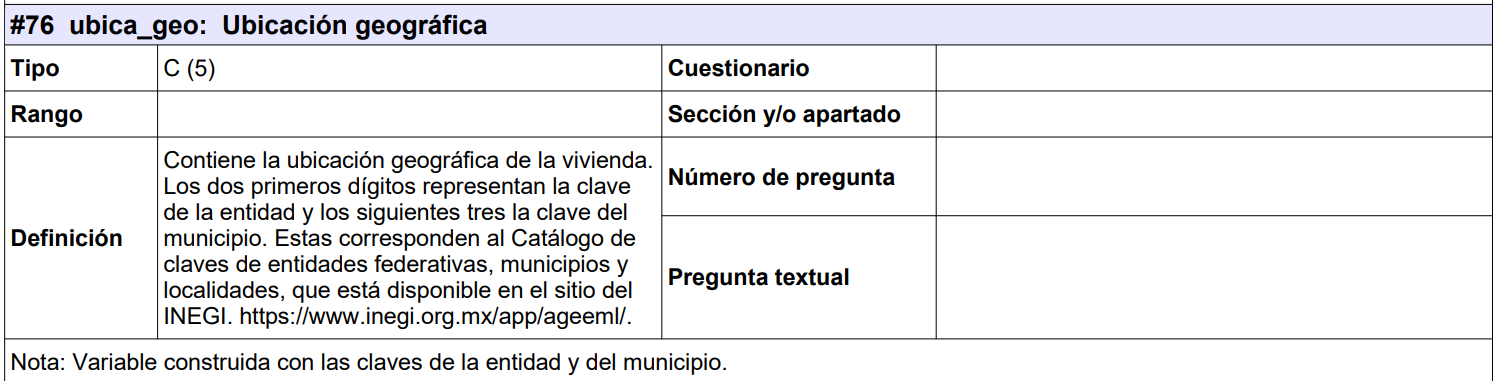

In [6]:
VIVIENDA_Campeche = VIVIENDA[VIVIENDA['ubica_geo'] == 4002]
VIVIENDA_Campeche

,folioviv,mat_pared,mat_techos,mat_pisos,cuart_dorm,num_cuarto,disp_elect,focos,focos_ahor,combus,aire_acond,calefacc,tot_resid,ubica_geo,est_socio,factor
9751,401166501,8,10,3,2,3,1,5,5,3,2,2,6,4002,3,127
9752,401166504,8,10,3,1,4,1,8,8,3,2,2,2,4002,3,127
9753,401166505,8,10,3,1,6,1,10,10,3,1,2,3,4002,3,127
9754,401166506,8,10,3,3,6,1,8,8,3,1,2,2,4002,3,127
9755,401167201,8,10,3,3,6,1,20,20,3,1,2,2,4002,4,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11427,461412713,8,10,2,2,2,1,3,0,1,2,2,4,4002,2,126
11428,461412714,8,10,3,1,2,1,5,5,1,2,2,4,4002,2,126
11429,461412715,8,10,2,1,1,1,2,2,1,2,2,3,4002,2,126
11430,461412716,8,10,3,2,6,1,20,20,3,1,2,3,4002,2,126


## Importar tabla HOGAR para San Francisco de Campeche (672 lineas)

In [7]:
f = '../data/raw/enigh2024_ns_hogares_csv/hogares.csv'
HOGAR = pd.read_csv(f, 
                       usecols = ['folioviv',
                                  'telefono', 'celular', 
                                  'num_venti', 'num_ester', 'num_radio', 'num_tva', 'num_tvd', 'num_dvd', 'num_licua', 
                                  'num_tosta', 'num_micro', 'num_refri', 'num_estuf', 'num_lavad', 'num_planc', 'num_maqui', 
                                  'num_aspir', 'num_compu', 'num_lap', 'num_table', 'num_impre', 'num_juego']
                      )
HOGAR

,folioviv,telefono,celular,num_ester,num_radio,num_tva,num_tvd,num_dvd,num_licua,num_tosta,...,num_lavad,num_planc,num_maqui,num_venti,num_aspir,num_compu,num_lap,num_table,num_impre,num_juego
0,100001901,2,1,0,0,0,1,1,1,0,...,1,1,0,1,0,0,1,0,0,0
1,100001902,1,1,0,1,0,1,1,1,0,...,1,1,0,0,0,0,1,0,1,0
2,100001904,1,1,0,0,0,2,0,1,0,...,1,1,1,1,0,0,0,0,0,0
3,100001905,1,1,1,0,0,2,0,1,0,...,1,1,0,0,0,0,0,1,0,0
4,100002501,1,1,1,0,0,2,0,1,0,...,1,1,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91409,3260593814,2,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
91410,3260593815,2,1,0,0,0,1,0,1,0,...,1,1,0,1,0,0,1,1,1,0
91411,3260593816,2,1,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
91412,3260593817,1,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
HOGAR_repetidos = HOGAR[HOGAR['folioviv'].isin(HOGAR['folioviv'][HOGAR['folioviv'].duplicated(keep=False)])].copy()
HOGAR_repetidos

,folioviv,telefono,celular,num_ester,num_radio,num_tva,num_tvd,num_dvd,num_licua,num_tosta,...,num_lavad,num_planc,num_maqui,num_venti,num_aspir,num_compu,num_lap,num_table,num_impre,num_juego
405,100073403,1,1,0,1,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
406,100073403,1,1,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
470,100085302,2,2,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
471,100085302,2,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
954,100172706,2,2,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91131,3260581023,2,1,0,1,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
91182,3260583305,2,1,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
91183,3260583305,2,1,0,0,0,2,0,1,0,...,1,1,0,0,0,0,0,0,0,1
91271,3260587717,2,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
cols_sumar = [
    'num_venti', 'num_ester', 'num_radio', 'num_tva', 'num_tvd', 'num_dvd', 'num_licua', 
    'num_tosta', 'num_micro', 'num_refri', 'num_estuf', 'num_lavad', 'num_planc', 'num_maqui', 
    'num_aspir', 'num_compu', 'num_lap', 'num_table', 'num_impre', 'num_juego'
]

def telefono_rule(x):
    return 1 if (x == 1).any() else 2

HOGAR = HOGAR.groupby('folioviv').agg(
    {**{col: 'sum' for col in cols_sumar},
     'telefono': telefono_rule,
     'celular': telefono_rule}
).reset_index()

HOGAR

,folioviv,num_venti,num_ester,num_radio,num_tva,num_tvd,num_dvd,num_licua,num_tosta,num_micro,...,num_planc,num_maqui,num_aspir,num_compu,num_lap,num_table,num_impre,num_juego,telefono,celular
0,100001901,1,0,0,0,1,1,1,0,1,...,1,0,0,0,1,0,0,0,2,1
1,100001902,0,0,1,0,1,1,1,0,0,...,1,0,0,0,1,0,1,0,1,1
2,100001904,1,0,0,0,2,0,1,0,1,...,1,1,0,0,0,0,0,0,1,1
3,100001905,0,1,0,0,2,0,1,0,1,...,1,0,0,0,0,1,0,0,1,1
4,100002501,0,1,0,0,2,0,1,0,0,...,1,0,0,0,0,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90319,3260593814,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,2,1
90320,3260593815,1,0,0,0,1,0,1,0,1,...,1,0,0,0,1,1,1,0,2,1
90321,3260593816,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,2,1
90322,3260593817,0,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1


In [10]:
HOGAR[HOGAR['folioviv'] == 100085302]

,folioviv,num_venti,num_ester,num_radio,num_tva,num_tvd,num_dvd,num_licua,num_tosta,num_micro,...,num_planc,num_maqui,num_aspir,num_compu,num_lap,num_table,num_impre,num_juego,telefono,celular
469,100085302,0,0,0,0,2,0,2,0,0,...,0,0,0,0,1,0,0,0,2,1


In [11]:
HOGAR_Campeche = HOGAR[HOGAR['folioviv'].isin(VIVIENDA_Campeche['folioviv'])].copy()
HOGAR_Campeche

,folioviv,num_venti,num_ester,num_radio,num_tva,num_tvd,num_dvd,num_licua,num_tosta,num_micro,...,num_planc,num_maqui,num_aspir,num_compu,num_lap,num_table,num_impre,num_juego,telefono,celular
9751,401166501,4,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
9752,401166504,3,0,1,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,2,1
9753,401166505,2,0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,1
9754,401166506,1,0,0,0,2,0,1,0,1,...,1,0,0,0,1,1,0,0,1,1
9755,401167201,4,1,1,0,3,0,1,1,1,...,1,0,1,0,3,0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11427,461412713,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
11428,461412714,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,2,1
11429,461412715,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
11430,461412716,1,0,0,0,1,0,1,0,1,...,1,0,0,0,1,0,1,0,2,1


## Importar tabla POBLACION para San Francisco de Campeche

In [12]:
f = '../data/raw/enigh2024_ns_poblacion_csv/poblacion.csv'
POBLACION = pd.read_csv(f,
                         usecols = ['folioviv','foliohog','edad','sexo',
                                    'numren', #Identificador de la persona 
                                    'edu_ini','asis_esc','nivel','grado',
                                    'hor_1','min_1','usotiempo1',
                                    'hor_2','min_2','usotiempo2',
                                    'hor_3','min_3','usotiempo3',
                                    'hor_4','min_4','usotiempo4',
                                    'hor_5','min_5','usotiempo5',
                                    'hor_6','min_6','usotiempo6',
                                    'hor_7','min_7','usotiempo7',
                                    'hor_8','min_8','usotiempo8'
                        ]
                      )
POBLACION

,folioviv,foliohog,numren,sexo,edad,edu_ini,asis_esc,nivel,grado,hor_1,...,usotiempo5,hor_6,min_6,usotiempo6,hor_7,min_7,usotiempo7,hor_8,min_8,usotiempo8
0,100001901,1,1,1,32,NaN,2.0,NaN,NaN,48,...,9.0,5,0,NaN,,,9.0,14,0,NaN
1,100001901,1,2,2,24,NaN,2.0,NaN,NaN,45,...,9.0,21,0,NaN,,,9.0,2,0,NaN
2,100001901,1,3,2,5,NaN,1.0,5.0,3.0,,...,NaN,,,NaN,,,NaN,,,NaN
3,100001901,1,4,1,2,6.0,NaN,NaN,NaN,,...,NaN,,,NaN,,,NaN,,,NaN
4,100001902,1,1,1,48,NaN,2.0,NaN,NaN,48,...,9.0,3,0,NaN,,,9.0,14,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308593,3260593816,1,5,1,12,NaN,1.0,7.0,1.0,,...,9.0,,,9.0,,,9.0,22,0,NaN
308594,3260593817,1,1,1,53,NaN,2.0,NaN,NaN,,...,9.0,,,9.0,,,9.0,12,0,NaN
308595,3260593817,1,2,2,54,NaN,2.0,NaN,NaN,80,...,9.0,2,0,NaN,,,9.0,,,9.0
308596,3260593818,1,1,2,63,NaN,2.0,NaN,NaN,,...,9.0,14,0,NaN,,,9.0,16,0,NaN


In [13]:
POBLACION_Campeche = POBLACION[POBLACION['folioviv'].isin(VIVIENDA_Campeche['folioviv'])].copy()
POBLACION_Campeche

,folioviv,foliohog,numren,sexo,edad,edu_ini,asis_esc,nivel,grado,hor_1,...,usotiempo5,hor_6,min_6,usotiempo6,hor_7,min_7,usotiempo7,hor_8,min_8,usotiempo8
32043,401166501,1,1,1,70,NaN,2.0,NaN,NaN,,...,9.0,,,9.0,,,9.0,91,0,NaN
32044,401166501,1,2,2,60,NaN,2.0,NaN,NaN,7,...,9.0,28,0,NaN,,,9.0,42,0,NaN
32045,401166501,1,3,2,23,NaN,2.0,NaN,NaN,7,...,9.0,7,0,NaN,,,9.0,7,0,NaN
32046,401166501,1,4,2,17,NaN,1.0,9.0,2.0,,...,NaN,5,0,NaN,,,9.0,56,0,NaN
32047,401166501,1,5,2,14,NaN,1.0,7.0,3.0,,...,9.0,1,0,NaN,,,9.0,49,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37840,461412716,1,3,1,14,NaN,1.0,7.0,3.0,,...,9.0,14,0,NaN,,,9.0,31,0,NaN
37841,461412718,1,1,1,61,NaN,2.0,NaN,NaN,50,...,9.0,14,0,NaN,,,9.0,35,0,NaN
37842,461412718,1,2,2,48,NaN,2.0,NaN,NaN,63,...,9.0,14,0,NaN,,,9.0,28,0,NaN
37843,461412718,1,3,2,24,NaN,2.0,NaN,NaN,30,...,9.0,21,0,NaN,,,9.0,49,0,NaN


# Importar tabla GASTOHOGAR, filtrar gastos de electricidad por vivienda para San Francisco de Campeche (656 lineas)

In [14]:
f = '../data/raw/enigh2024_ns_gastoshogar_csv/gastoshogar.csv'
GASTOHOGAR = pd.read_csv(f, 
                       usecols = ['folioviv',
                                  'foliohog',
                                  'clave',
                                  # 'mes_dia','fecha_adqu','cantidad', 'gasto', 'costo',
                                  'gasto_tri',
                                  # 'entidad',
                                  # 'factor'
                                 ]
                      )
GASTOHOGAR

,folioviv,foliohog,clave,gasto_tri
0,100001901,1,011131,167.14
1,100001901,1,011150,642.85
2,100001901,1,011231,192.85
3,100001901,1,011411,488.57
4,100001901,1,011460,1465.71
...,...,...,...,...
5311492,3260593818,1,131208,300
5311493,3260593818,1,13120A,210
5311494,3260593818,1,13120L,360
5311495,3260593818,1,181126,192.85


In [15]:
# solo nos quedamos con los que sean de electricidad clave = 045100
GASTOHOGAR_luz = GASTOHOGAR[GASTOHOGAR['clave'] == '045100'].copy()
GASTOHOGAR_luz['gasto_tri'] = pd.to_numeric(GASTOHOGAR_luz['gasto_tri'], errors='coerce')
GASTOHOGAR_luz = GASTOHOGAR_luz.drop(columns = ['foliohog','clave'])

#Vamos a reducir de hogares a viviendas, para ello se sumaran los valores de gasto_tri de todos los hogares de cada vivienda 
GASTOHOGAR_luz = GASTOHOGAR_luz.groupby('folioviv', as_index=False)['gasto_tri'].sum()
GASTOHOGAR_luz

,folioviv,gasto_tri
0,100001901,195.0
1,100001902,900.0
2,100001904,663.0
3,100001905,274.5
4,100002501,481.5
...,...,...
82089,3260593814,180.0
82090,3260593815,450.0
82091,3260593816,420.0
82092,3260593817,180.0


In [16]:
GASTOHOGAR_luz_Campeche = GASTOHOGAR_luz[GASTOHOGAR_luz['folioviv'].isin(VIVIENDA_Campeche['folioviv'])].copy()
GASTOHOGAR_luz_Campeche

,folioviv,gasto_tri
8977,401166501,735.0
8978,401166504,900.0
8979,401166505,3750.0
8980,401166506,822.0
8981,401167201,1800.0
...,...,...
10556,461412713,600.0
10557,461412714,645.0
10558,461412715,225.0
10559,461412716,2100.0


# Obtener Campeche_df con los datos de VIVIENDA, HOGAR, GASTOHOGAR

In [17]:
VIVIENDA_Campeche.columns

Index(['folioviv', 'mat_pared', 'mat_techos', 'mat_pisos', 'cuart_dorm',
       'num_cuarto', 'disp_elect', 'focos', 'focos_ahor', 'combus',
       'aire_acond', 'calefacc', 'tot_resid', 'ubica_geo', 'est_socio',
       'factor'],
      dtype='object')

In [18]:
HOGAR_Campeche.columns

Index(['folioviv', 'num_venti', 'num_ester', 'num_radio', 'num_tva', 'num_tvd',
       'num_dvd', 'num_licua', 'num_tosta', 'num_micro', 'num_refri',
       'num_estuf', 'num_lavad', 'num_planc', 'num_maqui', 'num_aspir',
       'num_compu', 'num_lap', 'num_table', 'num_impre', 'num_juego',
       'telefono', 'celular'],
      dtype='object')

In [19]:
GASTOHOGAR_luz_Campeche.columns

Index(['folioviv', 'gasto_tri'], dtype='object')

In [20]:
VIVIENDA_HOGAR_Campeche = pd.merge(
    VIVIENDA_Campeche,
    HOGAR_Campeche,
    on='folioviv',
    how='outer',
    indicator=False
)


In [21]:
# Merge completo con VIVIENDA_HOGAR_Campeche y GASTOHOGAR_luz_Campeche
Campeche_df = pd.merge(
    VIVIENDA_HOGAR_Campeche,
    GASTOHOGAR_luz_Campeche,
    on='folioviv',
    how='outer',   # conserva todos los registros de ambos DataFrames
    indicator=False # opcional, para ver de dónde viene cada fila
)

In [22]:
Campeche_df.isna().sum()

folioviv       0
mat_pared      0
mat_techos     0
mat_pisos      0
cuart_dorm     0
num_cuarto     0
disp_elect     0
focos          0
focos_ahor     0
combus         0
aire_acond     0
calefacc       0
tot_resid      0
ubica_geo      0
est_socio      0
factor         0
num_venti      0
num_ester      0
num_radio      0
num_tva        0
num_tvd        0
num_dvd        0
num_licua      0
num_tosta      0
num_micro      0
num_refri      0
num_estuf      0
num_lavad      0
num_planc      0
num_maqui      0
num_aspir      0
num_compu      0
num_lap        0
num_table      0
num_impre      0
num_juego      0
telefono       0
celular        0
gasto_tri     16
dtype: int64

In [23]:
Campeche_df.columns

Index(['folioviv', 'mat_pared', 'mat_techos', 'mat_pisos', 'cuart_dorm',
       'num_cuarto', 'disp_elect', 'focos', 'focos_ahor', 'combus',
       'aire_acond', 'calefacc', 'tot_resid', 'ubica_geo', 'est_socio',
       'factor', 'num_venti', 'num_ester', 'num_radio', 'num_tva', 'num_tvd',
       'num_dvd', 'num_licua', 'num_tosta', 'num_micro', 'num_refri',
       'num_estuf', 'num_lavad', 'num_planc', 'num_maqui', 'num_aspir',
       'num_compu', 'num_lap', 'num_table', 'num_impre', 'num_juego',
       'telefono', 'celular', 'gasto_tri'],
      dtype='object')

### Caracteristicas de la vivienda 
'folioviv', 'mat_pared', 'mat_techos', 'mat_pisos', 'cuart_dorm',
'num_cuarto', **'tot_resid'**, 'ubica_geo','est_socio', 
'factor',**'gasto_tri'**
'disp_elect' Esta varaible es solo para limpiar y quitar los que no tienen acceso al servicio de electricidad. 
### Cargas
'focos', 'focos_ahor', 'combus', 'aire_acond', 'calefacc', 
'num_venti', 'num_ester', 'num_radio', 'num_tva',
'num_tvd', 'num_dvd', 'num_licua', 'num_tosta', 'num_micro',
'num_refri', 'num_estuf', 'num_lavad', 'num_planc', 'num_maqui',
'num_aspir', 'num_compu', 'num_lap', 'num_table', 'num_impre',
'num_juego', 'telefono', 'celular'

### Utiles para agrupar
'aire_acond', 'calefacc', 'est_socio', 'num_cuarto', 'tot_resid'
'ubica_geo' Para otro analisis si, aca es un solo municipio

### Variables que me gustaria obtener con modelos o con otras encuestas
Consumo en kWh, superficie de construccion, factores relacionados con horarios de ocupacion y consumo

In [28]:
variables = ['num_cuarto', 
             # 'disp_elect', 
             'est_socio', 'aire_acond', 'calefacc', 'tot_resid']

# Número de opciones distintas por variable (excluyendo NaN)
opciones = Campeche_df[variables].nunique(dropna=True)

print("Opciones por variable:\n", opciones)

# Producto de todas las opciones
producto = np.prod(opciones)

print("\nTotal de grupos:", producto)


Opciones por variable:
 num_cuarto    10
est_socio      4
aire_acond     2
calefacc       1
tot_resid     10
dtype: int64

Producto total de combinaciones posibles: 800


800 son demasiados, hay que acotar en total de residentes y numero de cuartos

In [31]:
variables_agrupar = [
    'num_cuarto', 
    # 'disp_elect',
    # 'est_socio', 
    # 'aire_acond', 
    # 'calefacc', 
    'tot_resid'
]

conteos_ponderados = {}

for col in variables_agrupar:
    # Conteo ponderado
    conteo = (
        Campeche_df
        .groupby(col)['factor']
        .sum()
        .sort_values(ascending=False)
    )
    
    # Calcular porcentaje
    porcentaje = (conteo / conteo.sum()) * 100
    
    # Unir en un DataFrame
    resumen = pd.DataFrame({
        'conteo_ponderado': conteo,
        'porcentaje': porcentaje.round(2)  # redondear a 2 decimales
    })
    
    conteos_ponderados[col] = resumen

# Mostrar resultados
for col, resumen in conteos_ponderados.items():
    print("\n-----------")
    print(f"{col} (ponderado y porcentaje)\n")
    print(resumen)



-----------
num_cuarto (ponderado y porcentaje)

            conteo_ponderado  porcentaje
num_cuarto                              
4                      25405       29.45
3                      21061       24.42
5                      13876       16.09
2                      10742       12.45
6                       7418        8.60
1                       4294        4.98
7                       1553        1.80
8                       1154        1.34
9                        520        0.60
10                       234        0.27

-----------
tot_resid (ponderado y porcentaje)

           conteo_ponderado  porcentaje
tot_resid                              
3                     21385       24.79
2                     19878       23.05
4                     17526       20.32
1                     10648       12.34
5                      9151       10.61
6                      3841        4.45
7                      2253        2.61
8                       886        1.03
9        

In [38]:
print(f'Si para el numero de cuartos utilizamos las 5 opciones mas frecuentes perferiamos el {4.98+ 1.80+ 1.34+ 0.60+ 0.27}%')

Si para el numero de cuartos utilizamos las 5 opciones mas repetidas perferiamos el 8.99%


In [38]:
print(f'Si para el numero de residentes utilizamos las 5 opciones mas frecuentes perferiamos el {4.45+2.61+1.03+0.54+0.26}%')

Si para el numero de cuartos utilizamos las 5 opciones mas repetidas perferiamos el 8.99%


In [42]:
variables = [
             # 'num_cuarto', 
             # 'disp_elect', 
             'est_socio', 
             'aire_acond', 
             'calefacc', 
             # 'tot_resid'
            ]

# Número de opciones distintas por variable (excluyendo NaN)
opciones = Campeche_df[variables].nunique(dropna=True)
producto = np.prod(opciones)*5*5
print("\nGrupos reducidos:", producto)


Grupos reducidos: 200
